# Importing Necessary Libraries

In [2]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import json
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras import layers
from keras import ops
import keras
#import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np


The code in this cell is importing various libraries and modules that will be used in the project. Here is a breakdown of each line:

1. `import os`: This line imports the `os` module, which provides a way to interact with the operating system.

2. `from keras.preprocessing.image import ImageDataGenerator`: This line imports the `ImageDataGenerator` class from the `keras.preprocessing.image` module. This class is used for data augmentation and preprocessing of images.

3. `from keras.models import Sequential`: This line imports the `Sequential` class from the `keras.models` module. The `Sequential` class is used to build a sequential model in Keras.

4. `from keras.layers import Conv2D, MaxPooling2D`: This line imports the `Conv2D` and `MaxPooling2D` classes from the `keras.layers` module. These classes are used to add convolutional and max pooling layers to a neural network model.

5. `from keras.layers import Activation, Dropout, Flatten, Dense`: This line imports the `Activation`, `Dropout`, `Flatten`, and `Dense` classes from the `keras.layers` module. These classes are used to add different types of layers to a neural network model.

6. `import json`: This line imports the `json` module, which provides functions for working with JSON data.

7. `import matplotlib.pyplot as plt`: This line imports the `pyplot` module from the `matplotlib` library. This module is used for creating visualizations and plots.

8. `from keras.applications import ResNet50`: This line imports the `ResNet50` model from the `keras.applications` module. `ResNet50` is a pre-trained convolutional neural network model that can be used for image classification tasks.

9. `from keras.preprocessing.image import ImageDataGenerator`: This line imports the `ImageDataGenerator` class from the `keras.preprocessing.image` module. This class is used for data augmentation and preprocessing of images.

10. `from keras.models import Model`: This line imports the `Model` class from the `keras.models` module. The `Model` class is used to create a custom model in Keras.

11. `from keras.layers import Dense, GlobalAveragePooling2D`: This line imports the `Dense` and `GlobalAveragePooling2D` classes from the `keras.layers` module. These classes are used to add dense and global average pooling layers to a neural network model.

12. `from keras.optimizers import Adam`: This line imports the `Adam` optimizer from the `keras.optimizers` module. The `Adam` optimizer is commonly used for training neural networks.

13. `from tensorflow import keras`: This line imports the `keras` module from the `tensorflow` library. This is done to ensure compatibility between Keras and TensorFlow.

14. `from keras import layers`: This line imports the `layers` module from the `keras` library. This module provides additional layer classes for building neural network models.

15. `import tensorflow as tf`: This line imports the `tensorflow` library and assigns it the alias `tf`. TensorFlow is a popular deep learning framework.

16. `import numpy as np`: This line imports the `numpy` library and assigns it the alias `np`. NumPy is a library for numerical computing in Python.

Each import statement brings in specific functionality from the respective modules, allowing the code to use the functions, classes, and models defined in those modules.

# Loading Data from Folders

In [5]:
# Path to the main directory containing the dataset
data_dir = 'flowers'

# Paths to the training, validation, and test data directories
train_data_dir = data_dir + '/train'
validation_data_dir = data_dir + '/valid'
test_data_dir = data_dir + '/test'

# Model parameters
img_width, img_height = 150, 150  # Width and height of the images
input_shape = (img_width, img_height, 3)  # Input shape for the model (3 channels for RGB)
epochs = 50  # Number of training epochs
batch_size = 128  # Batch size for training
num_classes = len(os.listdir(train_data_dir))  # Number of classes, determined by the number of folders in the training data directory

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescaling factor for normalizing pixel values
    shear_range=0.2,  # Shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True)  # Randomly flipping half of the images horizontally

# Normalization of validation and test data (without data augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Creating image data generators for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),  # Resize images to target size
    batch_size=batch_size,
    class_mode='sparse')  # Use 'categorical' for multi-class classification

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    
    class_mode='categorical')


Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Found 819 images belonging to 102 classes.


The code in the previous cell is responsible for setting up the data generators for training, validation, and test sets in a computer vision project. Let's go through the code step by step:

1. The code defines the path to the main directory containing the dataset. In this case, the directory is named 'flowers'.

2. Next, it sets the paths to the training, validation, and test data directories by appending '/train', '/valid', and '/test' respectively to the main data directory path.

3. The code then defines some model parameters:
   - `img_width` and `img_height` represent the desired width and height of the images in the dataset.
   - `input_shape` is a tuple representing the shape of the input images for the model. In this case, it is set to `(img_width, img_height, 3)` which means the images have 3 channels for RGB color.
   - `epochs` specifies the number of training epochs.
   - `batch_size` determines the number of samples in each batch during training.
   - `num_classes` is calculated by counting the number of folders in the training data directory. It represents the number of classes in the dataset.

4. The code then sets up data augmentation for the training data using the `ImageDataGenerator` class from the Keras library. Data augmentation is a technique used to artificially increase the size of the training dataset by applying random transformations to the images. The specific augmentations used in this code are:
   - `rescale=1.0 / 255` normalizes the pixel values of the images by dividing them by 255, which scales them to the range of 0 to 1.
   - `shear_range=0.2` applies random shearing to the images with an intensity of 0.2, which means the images are sheared by a random angle in the counter-clockwise direction.
   - `zoom_range=0.2` randomly zooms into the images by a factor of 0.2.
   - `horizontal_flip=True` randomly flips half of the images horizontally.

5. The code also sets up normalization for the validation and test data using separate `ImageDataGenerator` instances. The only transformation applied here is `rescale=1.0 / 255` to normalize the pixel values.

6. Finally, the code creates image data generators for the training, validation, and test sets using the `flow_from_directory` method of the `ImageDataGenerator` class. These generators will provide batches of augmented or normalized images during model training and evaluation. The parameters for each generator include:
   - `target_size` specifies the desired width and height of the images.
   - `batch_size` determines the number of images in each batch.
   - `class_mode` is set to 'categorical' since this is a multi-class classification problem.

# Analyse the number of images in each class

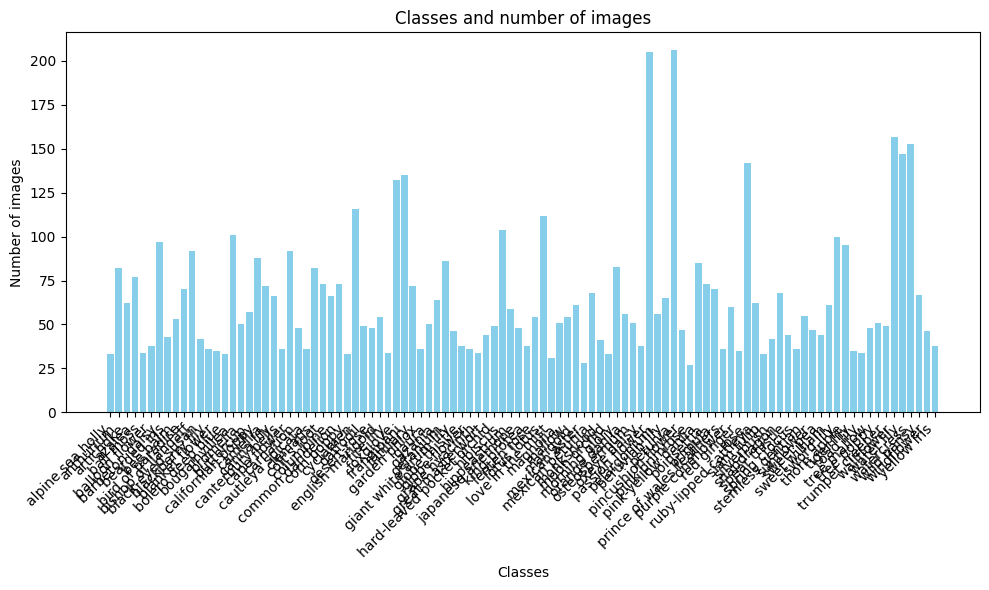

In [6]:
# Count the number of images in each class
try:
    with open('cat_to_name.json', 'r') as f:
        cat_to_name = json.load(f)
except Exception as e:
    print(e)
class_counts = {}  # Dictionary to hold the count of images per class
for class_name in os.listdir(train_data_dir):
    class_path = os.path.join(train_data_dir, class_name)  # Path to the class directory
    if os.path.isdir(class_path):
        class_count = len(os.listdir(class_path))  # Count the number of images in the class directory
        class_name = cat_to_name.get(class_name, class_name)  # Use the category name from the JSON mapping, if available
        class_counts[class_name] = class_count  # Update the dictionary with the count of images for this class

# Display the distribution of classes
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')  # Create a bar plot with class names and their respective counts
plt.xlabel('Classes')  # Label for the x-axis
plt.ylabel('Number of images')  # Label for the y-axis
plt.title('Classes and number of images')  # Title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate the class names on the x-axis for better readability
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot


The code in the previous cell is responsible for counting the number of images in each class of a dataset and displaying the distribution of classes using a bar plot.

Let's break down the code step by step:

1. The code starts by attempting to open a file called 'cat_to_name.json' using a `with` statement. This file is expected to contain a mapping of class names to their corresponding labels. If the file cannot be opened or an error occurs, the exception is caught and printed.

2. Next, a dictionary called `class_counts` is initialized. This dictionary will hold the count of images per class.

3. A loop is then used to iterate over the directories in the `train_data_dir` directory. Each directory represents a class.

4. Inside the loop, the path to the current class directory is constructed using `os.path.join(train_data_dir, class_name)`.

5. The code checks if the path is a directory using `os.path.isdir(class_path)`. If it is a directory, the code proceeds to count the number of images in that class.

6. The number of images in the class directory is obtained by using `len(os.listdir(class_path))`. This function returns a list of all the files in the directory, and `len()` is used to get the count of files.

7. If available, the code attempts to retrieve the category name from the `cat_to_name` dictionary using `cat_to_name.get(class_name, class_name)`. If the category name is not found in the dictionary, the original class name is used.

8. The count of images for the current class is then added to the `class_counts` dictionary using `class_counts[class_name] = class_count`.

9. After the loop finishes, the code proceeds to display the distribution of classes using a bar plot.

10. The `plt.figure(figsize=(10, 6))` line sets the size of the plot to 10 inches by 6 inches.

11. The `plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')` line creates a bar plot using the class names as the x-axis values and the respective counts as the y-axis values. The bars are colored sky blue.

12. The `plt.xlabel('Classes')` line sets the label for the x-axis as 'Classes'.

13. The `plt.ylabel('Number of images')` line sets the label for the y-axis as 'Number of images'.

14. The `plt.title('Classes and number of images')` line sets the title of the plot as 'Classes and number of images'.

15. The `plt.xticks(rotation=45, ha='right')` line rotates the class names on the x-axis by 45 degrees for better readability.

16. The `plt.tight_layout()` line adjusts the layout of the plot to prevent overlapping of labels.

17. Finally, the `plt.show()` line displays the plot.

In summary, this code counts the number of images in each class of a dataset and visualizes the distribution of classes using a bar plot.

In [7]:
from imageio import imread

with open('cat_to_name.json', 'r') as f:
    class_names = json.load(f)

class_name = []
for key, value in class_names.items():
    class_name.append(value)


print("Classes: ", class_name)

Classes:  ['fire lily', 'canterbury bells', 'bolero deep blue', 'pink primrose', 'mexican aster', 'prince of wales feathers', 'moon orchid', 'globe-flower', 'grape hyacinth', 'corn poppy', 'toad lily', 'siam tulip', 'red ginger', 'spring crocus', 'alpine sea holly', 'garden phlox', 'globe thistle', 'tiger lily', 'ball moss', 'love in the mist', 'monkshood', 'blackberry lily', 'spear thistle', 'balloon flower', 'blanket flower', 'king protea', 'oxeye daisy', 'yellow iris', 'cautleya spicata', 'carnation', 'silverbush', 'bearded iris', 'black-eyed susan', 'windflower', 'japanese anemone', 'giant white arum lily', 'great masterwort', 'sweet pea', 'tree mallow', 'trumpet creeper', 'daffodil', 'pincushion flower', 'hard-leaved pocket orchid', 'sunflower', 'osteospermum', 'tree poppy', 'desert-rose', 'bromelia', 'magnolia', 'english marigold', 'bee balm', 'stemless gentian', 'mallow', 'gaura', 'lenten rose', 'marigold', 'orange dahlia', 'buttercup', 'pelargonium', 'ruby-lipped cattleya', 'hi

C:\Users\smahi\AppData\Local\Temp\ipykernel_65520\2000614560.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_path)


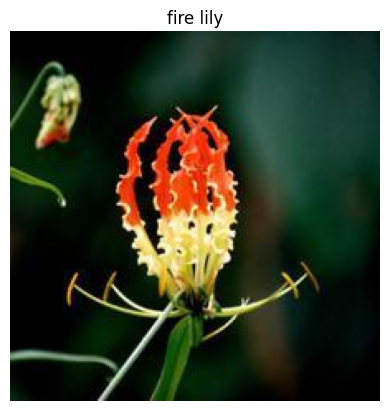

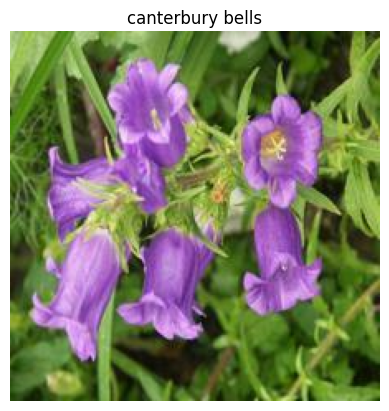

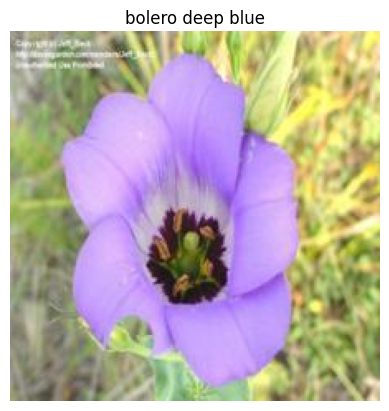

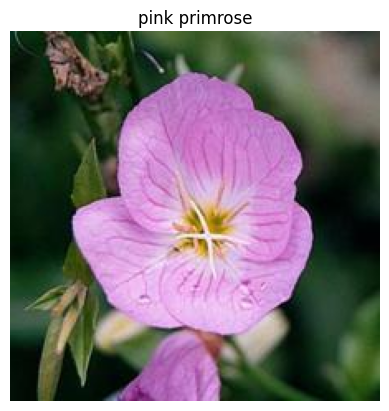

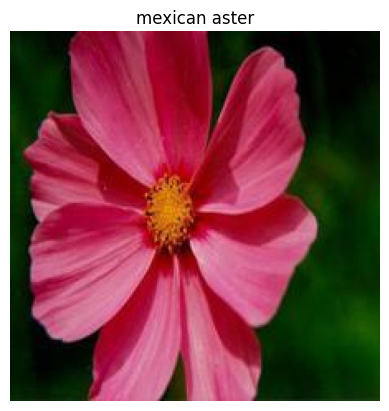

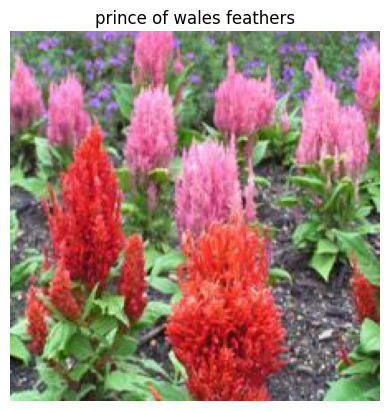

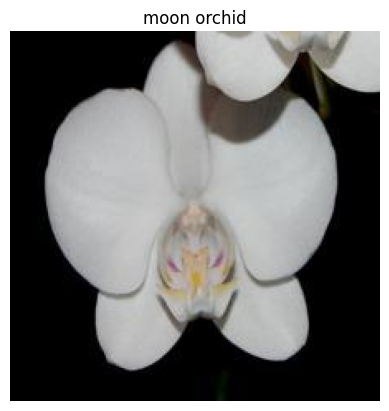

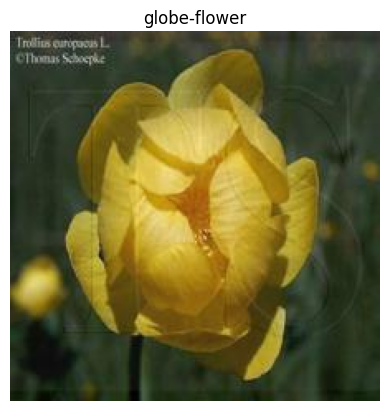

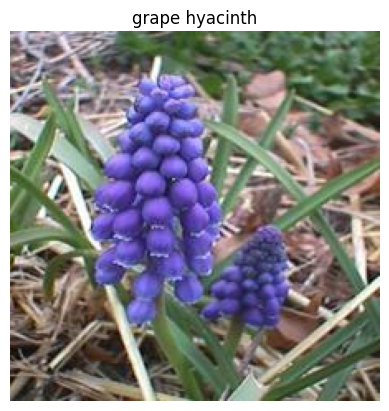

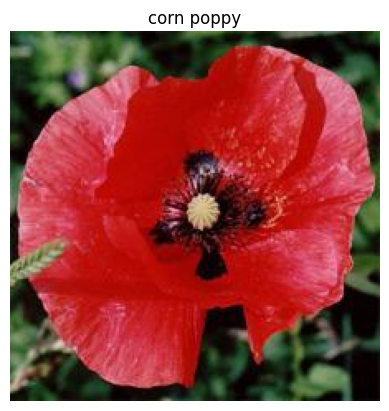

In [8]:
def visualize_one_image_per_class(data_dir, class_names, max_images = 10):
    for class_name in class_names[:max_images]:
        # Construct the path to the directory for each class
        class_dir = os.path.join(data_dir, class_name)
        # Check if the class directory exists
        if os.path.exists(class_dir):
            # List all image files in the directory (filtering by common image file extensions)
            image_files = [file for file in os.listdir(class_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
            # Check if there are any image files in the class directory
            if image_files:
                # Construct the path to the first image in the directory
                image_path = os.path.join(class_dir, image_files[0])
                # Read the image from the file
                image = imread(image_path)
                
                # Display the image
                plt.imshow(image)
                plt.title(class_name)  # Set the title of the plot to the class name
                plt.axis('off')  # Turn off the axis
                plt.show()  # Show the plot with the image
            else:
                # If no image files are found, print a message
                print(f"No images found for class: {class_name}")
        else:
            # If the class directory does not exist, print a message
            print(f"Class directory not found: {class_name}")

# Call the function to visualize one image from each class
visualize_one_image_per_class(train_data_dir, class_name)


# Training a basic CNN model

In [6]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))  # First convolutional layer with 32 filters of size 3x3
model.add(Activation('relu'))  # ReLU activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling operation with 2x2 pool size

model.add(Conv2D(64, (3, 3)))  # Second convolutional layer with 64 filters of size 3x3
model.add(Activation('relu'))  # ReLU activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling operation with 2x2 pool size

model.add(Conv2D(128, (3, 3)))  # Third convolutional layer with 128 filters of size 3x3
model.add(Activation('relu'))  # ReLU activation function
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling operation with 2x2 pool size

model.add(Flatten())  # Flatten the output to feed into a dense layer
model.add(Dense(128))  # Dense layer with 128 units
model.add(Activation('relu'))  # ReLU activation function
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting, dropping 50% of the units
model.add(Dense(num_classes))  # Output dense layer with a unit for each class
model.add(Activation('softmax'))  # Softmax activation function for multi-class classification

# Compilation of the model
model.compile(loss='categorical_crossentropy',  # Loss function for multi-class classification
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Metric to monitor

# Training the model
model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=epochs,  # Total number of epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=validation_generator.samples // batch_size)  # Number of validation steps


Epoch 1/50


KeyboardInterrupt: 

The current cell is a code snippet that defines and trains a Convolutional Neural Network (CNN) model for image classification. Let's go through each part of the code and explain its purpose:

1. Model Definition:
   - The code starts by creating a Sequential model, which is a linear stack of layers.
   - The model will be used to process images, so it is suitable for computer vision tasks.
   
2. Convolutional Layers:
   - The first layer added to the model is a Conv2D layer with 32 filters of size 3x3. This layer performs convolutional operations on the input images, extracting features using the specified filters.
   - The second layer is an Activation layer with the 'relu' activation function. ReLU (Rectified Linear Unit) is a commonly used activation function that introduces non-linearity to the model.
   - The third layer is a MaxPooling2D layer with a pool size of 2x2. Max pooling reduces the spatial dimensions of the input, helping to extract the most important features while reducing computational complexity.
   - These three layers together form the first convolutional block of the model.
   
3. Additional Convolutional Blocks:
   - The code then adds another convolutional block with similar layers: a Conv2D layer with 64 filters, an Activation layer with 'relu' activation, and a MaxPooling2D layer.
   - This block helps the model learn more complex and abstract features from the input images.
   
4. Final Convolutional Block:
   - The code adds a third convolutional block with a Conv2D layer of 128 filters, an Activation layer, and a MaxPooling2D layer.
   - This block further increases the model's capacity to learn intricate features.
   
5. Flattening and Dense Layers:
   - After the convolutional layers, the code adds a Flatten layer. This layer reshapes the output from the previous layers into a 1-dimensional vector, preparing it to be fed into a dense layer.
   - Next, a Dense layer with 128 units is added. Dense layers are fully connected layers, where each neuron is connected to every neuron in the previous layer. This layer helps the model learn high-level representations of the input data.
   - An Activation layer with 'relu' activation is added after the dense layer.
   - A Dropout layer with a dropout rate of 0.5 is added. Dropout randomly sets a fraction of input units to 0 during training, which helps prevent overfitting by reducing the reliance on specific neurons.
   
6. Output Layer:
   - The code adds a Dense layer with a number of units equal to the number of classes in the classification task. This layer represents the final output layer of the model.
   - An Activation layer with 'softmax' activation is added. Softmax converts the output values into probabilities, allowing the model to make predictions for multiple classes.
   
7. Model Compilation:
   - The model is compiled using the 'categorical_crossentropy' loss function, which is suitable for multi-class classification problems.
   - The 'adam' optimizer is used to optimize the model's weights during training.
   - The 'accuracy' metric is specified to monitor the model's performance during training.
   
8. Model Training:
   - The model is trained using the `fit` method.
   - The `train_generator` is used as the training data generator, which generates batches of training data on the fly.
   - The `steps_per_epoch` parameter determines the number of steps (batches) to be processed in each epoch.
   - The `epochs` parameter specifies the total number of epochs (complete passes through the training data) for training.
   - The `validation_generator` is used as the validation data generator, which generates batches of validation data.
   - The `validation_steps` parameter determines the number of steps (batches) to be processed for validation in each epoch.

In [13]:
# Evaluating the model on test data
scores = model.evaluate(test_generator, batch_size =  batch_size)  # Evaluate the model
print("Loss: {:.2f}".format(scores[0]))  # Print the loss
print("Accuracy: {:.2f}%".format(scores[1] * 100))  # Print the accuracy as a percentage


7/7 [==============================] - 1s 138ms/step - loss: 1.8640 - accuracy: 0.5604
Loss: 1.86
Accuracy: 56.04%


The code in the cell is evaluating a machine learning model on test data and printing the loss and accuracy of the model.

Let's break down the code line by line:

1. `scores = model.evaluate(test_generator, batch_size=batch_size)`: This line evaluates the model on the test data using the `evaluate` method of the `model` object. The `test_generator` is a generator object that provides the test data in batches, and `batch_size` specifies the number of samples in each batch. The `evaluate` method returns a list of scores, which in this case includes the loss and accuracy of the model.

2. `print("Loss: {:.2f}".format(scores[0]))`: This line prints the loss of the model. The `format` method is used to format the output string. The `"{:.2f}"` inside the curly braces specifies that the loss should be displayed as a floating-point number with two decimal places.

3. `print("Accuracy: {:.2f}%".format(scores[1] * 100))`: This line prints the accuracy of the model. Similar to the previous line, the `format` method is used to format the output string. The `"{:.2f}"` inside the curly braces specifies that the accuracy should be displayed as a floating-point number with two decimal places. The `scores[1]` represents the accuracy score, and `* 100` is used to convert it to a percentage.

In summary, this code evaluates a machine learning model on test data, retrieves the loss and accuracy scores, and prints them in a formatted manner.

# Training ResNet50 model from scratch

In [14]:
# Load the ResNet50 model without its top layer and with custom input shape
base_model = ResNet50(weights=None, include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers to tailor the model to your specific classification task
x = base_model.output  # Get the output from the base model
x = GlobalAveragePooling2D()(x)  # Apply global average pooling
x = Dense(1024, activation='relu')(x)  # Add a dense layer with 1024 units and ReLU activation
predictions = Dense(len(class_names), activation='softmax')(x)  # Final output layer with softmax activation for multi-class classification

# Create the final model with base_model's input and the custom output layer
model = Model(inputs=base_model.input, outputs=predictions)

# Compilation of the model
model.compile(loss='categorical_crossentropy',  # Loss function for multi-class classification
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Metric to monitor

# Define batch size and number of epochs for training
batch_size = 64
epochs = 10

# Data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Train the model using the training and validation data
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Define steps per epoch
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)  # Define validation steps

# Setting up data generator for testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Evaluate the performance of the model on the test data
scores = model.evaluate(test_generator, batch_size=batch_size)
print("Loss: {:.2f}".format(scores[0]))  # Print loss
print("Accuracy: {:.2f}%".format(scores[1] * 100))  # Print accuracy as a percentage


Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Epoch 1/10
102/102 [==============================] - 30s 253ms/step - loss: 4.6320 - accuracy: 0.0606 - val_loss: 4.7911 - val_accuracy: 0.0104
Epoch 2/10
102/102 [==============================] - 25s 239ms/step - loss: 3.5335 - accuracy: 0.1443 - val_loss: 5.2745 - val_accuracy: 0.0091
Epoch 3/10
102/102 [==============================] - 25s 240ms/step - loss: 3.1548 - accuracy: 0.2079 - val_loss: 4.7908 - val_accuracy: 0.0365
Epoch 4/10
102/102 [==============================] - 25s 240ms/step - loss: 2.8665 - accuracy: 0.2600 - val_loss: 4.1744 - val_accuracy: 0.1146
Epoch 5/10
102/102 [==============================] - 25s 242ms/step - loss: 2.6825 - accuracy: 0.2961 - val_loss: 3.6088 - val_accuracy: 0.1562
Epoch 6/10
102/102 [==============================] - 25s 241ms/step - loss: 2.4872 - accuracy: 0.3375 - val_loss: 3.3998 - val_accuracy: 0.2201
Epoch 7/10
102/102 [=======================

The code you provided is a snippet from a Python script that demonstrates how to use the ResNet50 model for image classification. Let's break it down step by step:

1. The code begins by importing the necessary libraries and modules. It assumes that the `ResNet50` model is already imported.

2. The next line creates an instance of the `ResNet50` model without its top layer and with a custom input shape. The `weights=None` argument means that the model will be initialized with random weights instead of using pre-trained weights. The `include_top=False` argument excludes the fully connected layers at the top of the model. The `input_shape=(img_width, img_height, 3)` argument specifies the shape of the input images.

3. Custom layers are added to the base model to tailor it to a specific classification task. The output from the base model is assigned to the variable `x`. 

4. The `GlobalAveragePooling2D` layer is applied to `x`. This layer reduces the spatial dimensions of the input and computes the average value for each feature map. It helps to extract global features from the input.

5. A dense layer with 1024 units and ReLU activation is added to `x`. This layer introduces non-linearity and helps to learn complex patterns in the data.

6. The final output layer is added with `len(class_names)` units and softmax activation. This layer produces the predicted probabilities for each class in the classification task.

7. The `Model` class is used to create the final model, which takes the base model's input and the custom output layer as its inputs.

8. The model is compiled with the loss function set to `'categorical_crossentropy'`, which is commonly used for multi-class classification tasks. The optimizer is set to `'adam'`, which is an efficient optimization algorithm. The metric to monitor during training is set to `'accuracy'`.

9. The batch size and number of epochs for training are defined.

10. Data generators are created for training, validation, and testing. These generators generate batches of augmented data on-the-fly, which helps to efficiently train the model on large datasets.

11. The model is trained using the `fit` method. The `train_generator` provides the training data, and the `validation_generator` provides the validation data. The `steps_per_epoch` and `validation_steps` parameters define the number of steps (batches) to process in each epoch.

12. After training, a data generator is set up for testing using the `test_datagen` and `test_generator`.

13. The performance of the model on the test data is evaluated using the `evaluate` method. The `scores` variable contains the loss and accuracy values.

14. Finally, the loss and accuracy are printed to the console.

Now, let's discuss ResNet (Residual Neural Network). ResNet is a deep convolutional neural network architecture that was introduced in 2015. It was designed to address the problem of vanishing gradients in very deep neural networks. 

The key innovation in ResNet is the introduction of residual connections, also known as skip connections. These connections allow the network to learn residual functions, which are the differences between the input and output of a layer. By propagating the original input along with the learned features, ResNet enables the network to learn more easily and effectively.

ResNet50 specifically refers to a variant of ResNet that has 50 layers. It consists of a series of convolutional layers, followed by residual blocks. Each residual block contains multiple convolutional layers and a skip connection. The skip connection bypasses the convolutional layers and adds the original input to the output of the block.

ResNet50 has achieved state-of-the-art performance on various image classification tasks and has become a popular choice for transfer learning. Transfer learning involves using pre-trained models, such as ResNet50, as a starting point for training on a new dataset. By leveraging the learned features from a large dataset, transfer learning can significantly improve the performance of models on smaller datasets.

In summary, ResNet50 is a deep convolutional neural network architecture that incorporates residual connections to address the vanishing gradient problem. It has been widely used for image classification tasks and is known for its excellent performance and transfer learning capabilities.

# Training ResNet50 using Transfer Learning from Imagenet Weights

In [15]:
# Load the ResNet50 model with pre-trained ImageNet weights, excluding its top (fully connected) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers to tailor the model to your specific classification task
x = base_model.output  # Output from the base model
x = GlobalAveragePooling2D()(x)  # Apply global average pooling to the output
x = Dense(1024, activation='relu')(x)  # Add a dense layer with 1024 neurons and ReLU activation
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer with softmax activation for multi-class classification

# Create the final model by combining the base model and the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compilation of the model
model.compile(loss='categorical_crossentropy',  # Loss function for multi-class classification
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Metric to monitor

# Define batch size and number of epochs for training
batch_size = 64
epochs = 10

# Train the model using the training and validation data
model.fit(
    train_generator,  # Training data dgenerator
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=epochs,  # Total number of epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=validation_generator.samples // batch_size)  # Number of validation steps

# Setting up data generator for testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,  # Test data directory
    target_size=(img_width, img_height),  # Resize images to the specified size
    batch_size=batch_size,  # Batch size for testing
    class_mode='categorical')  # Class mode for categorical classification

# Evaluate the performance of the model on the test data
scores = model.evaluate(test_generator, batch_size = batch_size)
print("Loss: {:.2f}".format(scores[0]))  # Print loss
print("Accuracy: {:.2f}%".format(scores[1] * 100))  # Print accuracy as a percentage


Epoch 1/10
102/102 [==============================] - 29s 249ms/step - loss: 2.2674 - accuracy: 0.4653 - val_loss: 4.9016 - val_accuracy: 0.0091
Epoch 2/10
102/102 [==============================] - 25s 240ms/step - loss: 0.8811 - accuracy: 0.7434 - val_loss: 32.9991 - val_accuracy: 0.0234
Epoch 3/10
102/102 [==============================] - 25s 241ms/step - loss: 0.5590 - accuracy: 0.8345 - val_loss: 14.6550 - val_accuracy: 0.0078
Epoch 4/10
102/102 [==============================] - 25s 241ms/step - loss: 0.3845 - accuracy: 0.8830 - val_loss: 6.8117 - val_accuracy: 0.0078
Epoch 5/10
102/102 [==============================] - 25s 242ms/step - loss: 0.3468 - accuracy: 0.8981 - val_loss: 8.6934 - val_accuracy: 0.0130
Epoch 6/10
102/102 [==============================] - 25s 242ms/step - loss: 0.2442 - accuracy: 0.9248 - val_loss: 6.8537 - val_accuracy: 0.0091
Epoch 7/10
102/102 [==============================] - 25s 243ms/step - loss: 0.2239 - accuracy: 0.9319 - val_loss: 7.1727 - val_

In the previous cell, we loaded the ResNet50 model with pre-trained ImageNet weights and added custom layers on top of it for our specific classification task. This allowed us to leverage the pre-trained weights of the ResNet50 model, which were learned from a large dataset containing various images.

In this current cell, the main difference is that we are not training the ResNet50 model from scratch. Instead, we are using transfer learning. Transfer learning is a technique where we take a pre-trained model and fine-tune it on a different but related task.

Specifically, we are using the pre-trained ResNet50 model as a base model, excluding its top (fully connected) layer. We then add our own custom layers on top of the base model to tailor it to our specific classification task. By doing this, we can leverage the knowledge and feature extraction capabilities of the pre-trained ResNet50 model, which has already learned to recognize a wide range of features from the ImageNet dataset.

By using transfer learning, we can benefit from the pre-trained model's ability to extract meaningful features from images, which can greatly improve the performance of our model even with a smaller dataset. This approach is especially useful when we have limited training data or when training a deep neural network from scratch is computationally expensive.

Overall, the main difference in this cell is that we are utilizing transfer learning with the ResNet50 model, leveraging its pre-trained weights from the ImageNet dataset, and fine-tuning it for our specific classification task.

# Training Transformers on the dataset

## Configure the hyperparameters

In [6]:
batch_size = 128
num_epochs = 100  
image_size = 150  # We'll resize input images to this size
patch_size = 15  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescaling factor for normalizing pixel values
    shear_range=0.2,  # Shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True)  # Randomly flipping half of the images horizontally

# Normalization of validation and test data (without data augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Creating image data generators for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),  # Resize images to target size
    batch_size=batch_size,
    class_mode='sparse')  # Use 'categorical' for multi-class classification

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    
    class_mode='sparse')

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.
Found 819 images belonging to 102 classes.


## Implement multilayer perceptron (MLP)


In [7]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


## Implement patch creation as a layer


In [8]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

Image size: 150 X 150
Patch size: 15 X 15
Patches per image: 100
Elements per patch: 675


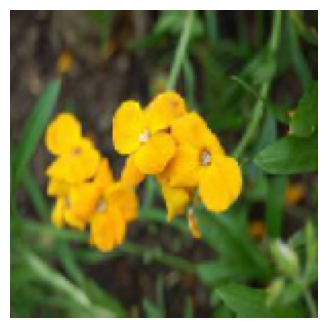

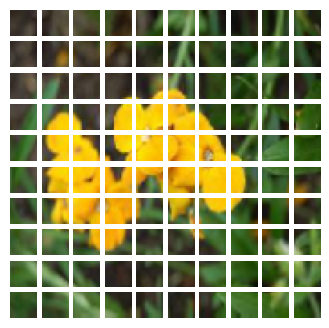

In [10]:
plt.figure(figsize=(4, 4))
one_batch = train_generator[0][0]
image = one_batch[np.random.choice(range(one_batch.shape[0]))]
plt.imshow(image)
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img))
    plt.axis("off")


## Implement the patch encoding layer


In [11]:
@tf.autograph.experimental.do_not_convert
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

## Build the ViT model


In [12]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

## Compile, train, and evaluate the mode


In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

def run_experiment(model):

    model.compile(
        optimizer="adam",
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        train_generator,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint_callback],
    )

    return history


vit_classifier = create_vit_classifier()
#history = run_experiment(vit_classifier)
model = vit_classifier
model.compile(
        optimizer="adam",
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


#plot_history("loss")
#plot_history("top-5-accuracy")

In [20]:
model.load_weights("checkpoint.weights.h5")
_, accuracy, top_5_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.2045 - loss: 3.1886 - top-5-accuracy: 0.4731
Test accuracy: 21.0%
Test top 5 accuracy: 48.35%
